In [422]:
import pandas as pd
import numpy as np

## Business Patterns by ZIP

In [401]:
bp_zip = pd.read_csv('https://raw.githubusercontent.com/jhancuch/sba-loan-credit-analysis/main/data/business_patterns_zip/zbp20totals.txt', delimiter=',', encoding = 'unicode_escape', engine ='python')

In [402]:
bp_zip.head()

,zip,name,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,city,stabbr,cty_name
0,501,"HOLTSVILLE, NY",J,49,J,261,J,850,5,HOLTSVILLE,NY,SUFFOLK
1,1001,"AGAWAM, MA",G,7944,G,100626,G,409249,469,AGAWAM,MA,HAMPDEN
2,1002,"AMHERST, MA",H,7732,H,73903,H,294936,523,AMHERST,MA,HAMPSHIRE
3,1003,"AMHERST, MA",G,239,H,2515,H,9481,16,AMHERST,MA,HAMPSHIRE
4,1004,"AMHERST, MA",J,197,H,1439,H,5892,9,AMHERST,MA,HAMPSHIRE


In [29]:
bp_zip_1 = bp_zip[["zip", "emp", "est", "ap"]]

In [30]:
# rename columns to make them more intuitive
bp_zip_2 = bp_zip_1.rename(columns = {"emp": "num_employees", "est": "num_establishments", "ap": "annual_payroll_1000s"})

In [31]:
bp_zip_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35053 entries, 0 to 35052
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   zip                   35053 non-null  int64
 1   num_employees         35053 non-null  int64
 2   num_establishments    35053 non-null  int64
 3   annual_payroll_1000s  35053 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB


In [32]:
# convert zip column to a string and pad with zeros
bp_zip_2['zip'] = bp_zip_2['zip'].astype(str).str.zfill(5)

In [33]:
# Check that we don't have any duplicate zips
print(len(bp_zip_2.zip))
print(len(bp_zip_2.zip.drop_duplicates()))

35053
35053


In [38]:
# Summary Statistics
bp_zip_2['num_employees'].describe()

count    3.505300e+04
mean     3.823588e+03
std      3.550615e+04
min      0.000000e+00
25%      8.000000e+01
50%      4.230000e+02
75%      3.367000e+03
max      6.476624e+06
Name: num_employees, dtype: float64

In [54]:
bp_zip_2['average_salary'] = (bp_zip_2['annual_payroll_1000s']*1000)/bp_zip_2['num_employees']
bp_zip_2['average_salary'].describe()

count    3.505300e+04
mean              inf
std               NaN
min      1.224490e+03
25%      3.208814e+04
50%      3.964880e+04
75%      4.942221e+04
max               inf
Name: average_salary, dtype: float64

In [57]:
# For any of the zips where there were 0 employees recorded, we replace the inf with the total annual payroll
bp_zip_2[bp_zip_2['average_salary'] == np.inf]

,zip,num_employees,num_establishments,annual_payroll_1000s,average_salary
11444,32855,0,3,454,inf
31711,91102,0,3,92,inf
32660,93642,0,3,235,inf


In [61]:
bp_zip_2.loc[bp_zip_2['average_salary'] == np.inf, 'average_salary'] = bp_zip_2['annual_payroll_1000s']*1000

In [35]:
bp_zip_2['num_establishments'].describe()

count    35053.000000
mean       228.085356
std        443.894261
min          3.000000
25%         11.000000
50%         41.000000
75%        255.000000
max      33466.000000
Name: num_establishments, dtype: float64

In [36]:
bp_zip_2['annual_payroll_1000s'].describe()

count    3.505300e+04
mean     2.156041e+05
std      2.154285e+06
min      1.100000e+01
25%      2.958000e+03
50%      1.716600e+04
75%      1.425480e+05
max      3.820090e+08
Name: annual_payroll_1000s, dtype: float64

<AxesSubplot:>

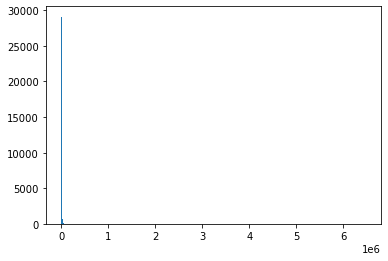

In [48]:
bp_zip_2['num_employees'].hist(bins=1000, grid=False)

<AxesSubplot:>

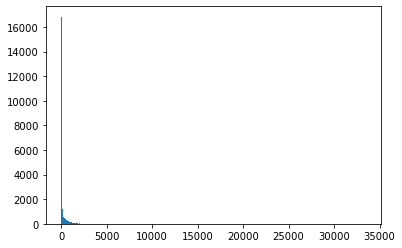

In [47]:
bp_zip_2['num_establishments'].hist(bins=1000, grid=False)

<AxesSubplot:>

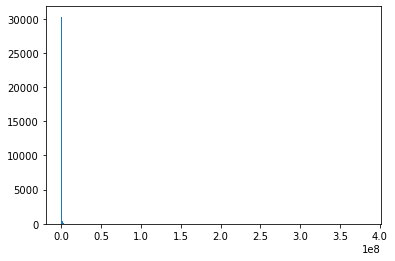

In [52]:
bp_zip_2['annual_payroll_1000s'].hist(bins=1000, grid=False)

<AxesSubplot:>

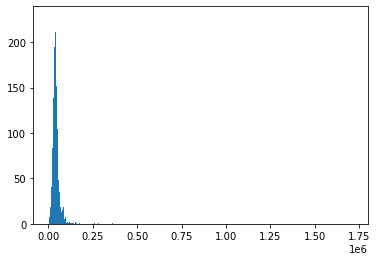

In [63]:
bp_zip_2['average_salary'].hist(bins=10000, grid=False)

## Total Population

In [415]:
tot_pop = pd.read_csv('https://raw.githubusercontent.com/jhancuch/sba-loan-credit-analysis/main/data/total_population/tot_population_2020.csv')

In [416]:
tot_pop.head()

,B01003_001E,B01003_001M,GEO_ID,NAME
0,Estimate!!Total,Margin of Error!!Total,id,Geographic Area Name
1,16773,259,8600000US00601,ZCTA5 00601
2,37083,149,8600000US00602,ZCTA5 00602
3,45652,784,8600000US00603,ZCTA5 00603
4,6231,337,8600000US00606,ZCTA5 00606


In [67]:
tot_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   B01003_001E  33121 non-null  object
 1   B01003_001M  33121 non-null  object
 2   GEO_ID       33121 non-null  object
 3   NAME         33121 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [68]:
# Rename columns and drop the extra header row
tot_pop1 = tot_pop.rename(columns = {"B01003_001E": "total_pop", "NAME": "zip"})

In [72]:
tot_pop2 = tot_pop1.iloc[1:, :].drop(axis=1, columns=['B01003_001M','GEO_ID'])

In [74]:
# Remove ZCTA5 string and convert total_pop to int
tot_pop2['zip'] = tot_pop2['zip'].replace('ZCTA5 ', '', regex=True)
tot_pop2['total_pop'] = tot_pop2['total_pop'].astype(int)

In [75]:
tot_pop2

,total_pop,zip
1,16773,00601
2,37083,00602
3,45652,00603
4,6231,00606
5,26502,00610
...,...,...
33116,12,99923
33117,990,99925
33118,1582,99926
33119,0,99927


array([[<AxesSubplot:title={'center':'total_pop'}>]], dtype=object)

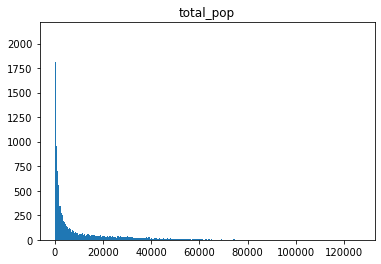

In [76]:
tot_pop2.hist(bins=1000, grid=False)

## Employment Status

In [403]:
emp_status = pd.read_csv('https://raw.githubusercontent.com/jhancuch/sba-loan-credit-analysis/main/data/employment_status/employment2020.csv', header = 1)

In [404]:
emp_status.head()

,id,Geographic Area Name,Estimate!!Occupied housing units!!Occupied housing units,Margin of Error!!Occupied housing units!!Occupied housing units,"Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","Margin of Error!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","Margin of Error!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","Margin of Error!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999",...,"Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more","Margin of Error!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more","Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!Less than 20 percent","Margin of Error!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!Less than 20 percent","Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!20 to 29 percent","Margin of Error!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!20 to 29 percent","Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!30 percent or more","Margin of Error!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!30 percent or more",Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income,Margin of Error!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income
0,8600000US00601,ZCTA5 00601,5555,255,1032,223,945,164,913,178,...,68,46,68,46,0,23,0,23,128,52
1,8600000US00602,ZCTA5 00602,12901,432,1670,305,2028,309,2124,364,...,762,196,669,181,93,90,0,30,324,123
2,8600000US00603,ZCTA5 00603,19431,496,4172,443,2812,334,2397,323,...,1317,264,1252,266,65,47,0,30,1012,268
3,8600000US00606,ZCTA5 00606,1983,181,351,103,386,124,255,84,...,20,20,20,20,0,20,0,20,77,40
4,8600000US00610,ZCTA5 00610,8864,348,855,189,1261,237,1242,249,...,457,150,446,149,11,17,0,27,269,118


In [147]:
emp_status_1 = emp_status[['Geographic Area Name', 
                           'Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Less than $20,000!!Less than 20 percent',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Less than $20,000!!20 to 29 percent',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Less than $20,000!!30 percent or more',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$20,000 to $34,999!!Less than 20 percent',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$20,000 to $34,999!!20 to 29 percent',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$20,000 to $34,999!!30 percent or more',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$35,000 to $49,999!!Less than 20 percent',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$35,000 to $49,999!!20 to 29 percent',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$35,000 to $49,999!!30 percent or more',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$50,000 to $74,999!!Less than 20 percent',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$50,000 to $74,999!!20 to 29 percent',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$50,000 to $74,999!!30 percent or more',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!Less than 20 percent',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!20 to 29 percent',
                           'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!30 percent or more'
                          ]]

In [148]:
emp_status_2 = emp_status_1.rename(columns = {'Geographic Area Name': 'zip', 
                                              'Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)': 'houshold_income_2020_median',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Less than $20,000!!Less than 20 percent': 'incm_l_20k_house_pct_l_20',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Less than $20,000!!20 to 29 percent': 'incm_l_20k_house_pct_l_30_gt_20',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Less than $20,000!!30 percent or more': 'incm_l_20k_house_pct_gt_30',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$20,000 to $34,999!!Less than 20 percent': 'incm_gt_20k_l_35k_house_pct_l_20',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$20,000 to $34,999!!20 to 29 percent': 'incm_gt_20k_l_35k_house_pct_l_30_gt_20',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$20,000 to $34,999!!30 percent or more': 'incm_gt_20k_l_35k_house_pct_gt_30',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$35,000 to $49,999!!Less than 20 percent': 'incm_gt_35k_l_50k_house_pct_l_20',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$35,000 to $49,999!!20 to 29 percent': 'incm_gt_35k_l_50k_house_pct_l_30_gt_20',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$35,000 to $49,999!!30 percent or more': 'incm_gt_35k_l_50k_house_pct_gt_30',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$50,000 to $74,999!!Less than 20 percent': 'incm_gt_50k_l_75k_house_pct_l_20',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$50,000 to $74,999!!20 to 29 percent': 'incm_gt_50k_l_75k_house_pct_l_30_gt_20',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$50,000 to $74,999!!30 percent or more': 'incm_gt_50k_l_75k_house_pct_gt_30',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!Less than 20 percent': 'incm_gt_75k_house_pct_l_20',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!20 to 29 percent': 'incm_gt_75k_house_pct_l_30_gt_20',
                                              'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!30 percent or more': 'incm_gt_75k_house_pct_gt_30'})

In [149]:
emp_status_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   zip                                     33120 non-null  object
 1   houshold_income_2020_median             33120 non-null  object
 2   incm_l_20k_house_pct_l_20               33120 non-null  int64 
 3   incm_l_20k_house_pct_l_30_gt_20         33120 non-null  int64 
 4   incm_l_20k_house_pct_gt_30              33120 non-null  int64 
 5   incm_gt_20k_l_35k_house_pct_l_20        33120 non-null  int64 
 6   incm_gt_20k_l_35k_house_pct_l_30_gt_20  33120 non-null  int64 
 7   incm_gt_20k_l_35k_house_pct_gt_30       33120 non-null  int64 
 8   incm_gt_35k_l_50k_house_pct_l_20        33120 non-null  int64 
 9   incm_gt_35k_l_50k_house_pct_l_30_gt_20  33120 non-null  int64 
 10  incm_gt_35k_l_50k_house_pct_gt_30       33120 non-null  int64 
 11  in

In [150]:
# Remove ZCTA5 string and convert houshold_income_2020_median to int. For non-disclosed figures due to masking concerns, I use the median value of the median household income
emp_status_2['zip'] = emp_status_2['zip'].replace('ZCTA5 ', '', regex=True)

emp_status_2['houshold_income_2020_median'] = emp_status_2['houshold_income_2020_median'].replace('250,000+', '250000')
emp_status_2['houshold_income_2020_median'] = emp_status_2['houshold_income_2020_median'].replace('2,500-', np.nan, regex=True)
emp_status_2['houshold_income_2020_median'] = emp_status_2['houshold_income_2020_median'].replace('-', np.nan, regex=True)

emp_status_2['houshold_income_2020_median'] = emp_status_2['houshold_income_2020_median'].astype(float)
emp_status_2.loc[emp_status_2['houshold_income_2020_median'] == np.nan, 'houshold_income_2020_median'] = emp_status_2['houshold_income_2020_median'].median

In [151]:
emp_status_2.columns[1:]

Index(['houshold_income_2020_median', 'incm_l_20k_house_pct_l_20',
       'incm_l_20k_house_pct_l_30_gt_20', 'incm_l_20k_house_pct_gt_30',
       'incm_gt_20k_l_35k_house_pct_l_20',
       'incm_gt_20k_l_35k_house_pct_l_30_gt_20',
       'incm_gt_20k_l_35k_house_pct_gt_30', 'incm_gt_35k_l_50k_house_pct_l_20',
       'incm_gt_35k_l_50k_house_pct_l_30_gt_20',
       'incm_gt_35k_l_50k_house_pct_gt_30', 'incm_gt_50k_l_75k_house_pct_l_20',
       'incm_gt_50k_l_75k_house_pct_l_30_gt_20',
       'incm_gt_50k_l_75k_house_pct_gt_30', 'incm_gt_75k_house_pct_l_20',
       'incm_gt_75k_house_pct_l_30_gt_20', 'incm_gt_75k_house_pct_gt_30'],
      dtype='object')

<AxesSubplot:>

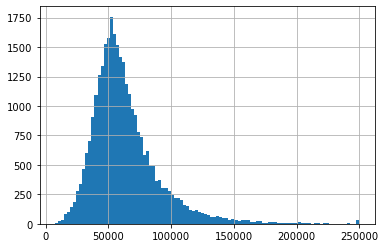

In [185]:
emp_status_2['houshold_income_2020_median'].hist(bins=100)

<AxesSubplot:>

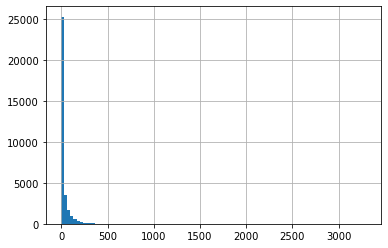

In [187]:
emp_status_2['incm_l_20k_house_pct_l_20'].hist(bins=100)

<AxesSubplot:>

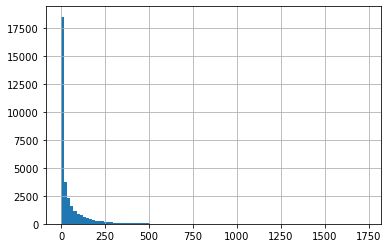

In [188]:
emp_status_2['incm_l_20k_house_pct_l_30_gt_20'].hist(bins=100)

<AxesSubplot:>

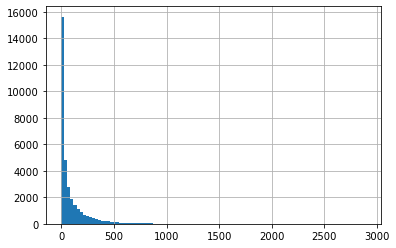

In [189]:
emp_status_2['incm_gt_20k_l_35k_house_pct_l_20'].hist(bins=100)

<AxesSubplot:>

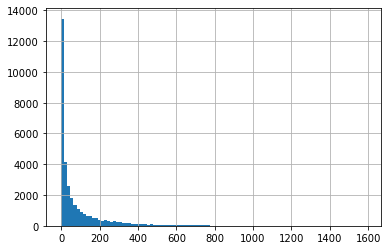

In [190]:
emp_status_2['incm_gt_20k_l_35k_house_pct_l_30_gt_20'].hist(bins=100)

<AxesSubplot:>

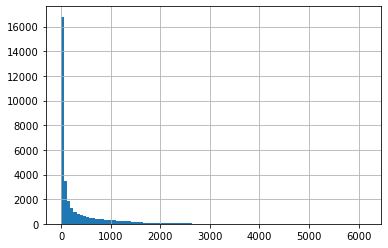

In [191]:
emp_status_2['incm_gt_20k_l_35k_house_pct_gt_30'].hist(bins=100)

<AxesSubplot:>

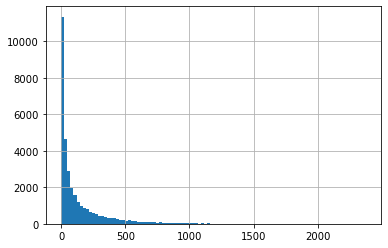

In [192]:
emp_status_2['incm_gt_35k_l_50k_house_pct_l_20'].hist(bins=100)

<AxesSubplot:>

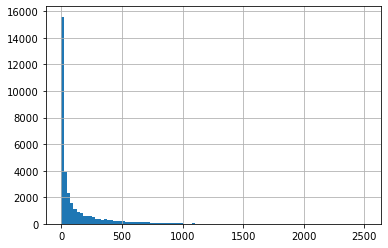

In [193]:
emp_status_2['incm_gt_35k_l_50k_house_pct_l_30_gt_20'].hist(bins=100)

<AxesSubplot:>

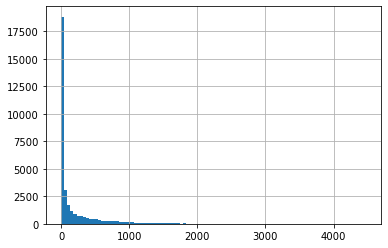

In [194]:
emp_status_2['incm_gt_35k_l_50k_house_pct_gt_30'].hist(bins=100)

<AxesSubplot:>

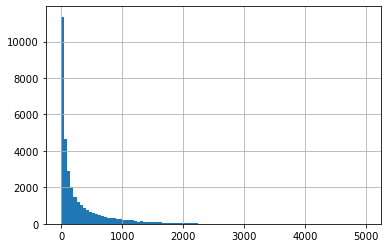

In [195]:
emp_status_2['incm_gt_50k_l_75k_house_pct_l_20'].hist(bins=100)

<AxesSubplot:>

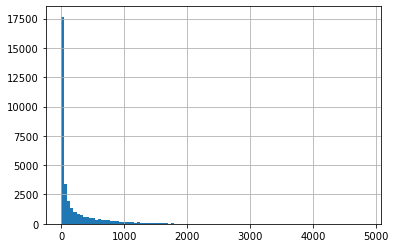

In [196]:
emp_status_2['incm_gt_50k_l_75k_house_pct_l_30_gt_20'].hist(bins=100)

<AxesSubplot:>

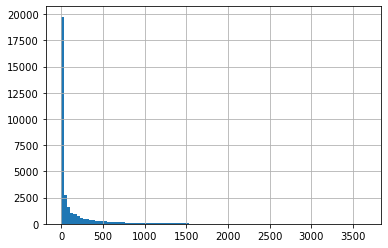

In [197]:
emp_status_2['incm_gt_50k_l_75k_house_pct_gt_30'].hist(bins=100)

<AxesSubplot:>

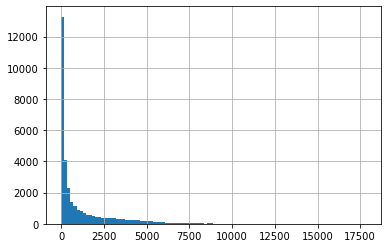

In [198]:
emp_status_2['incm_gt_75k_house_pct_l_20'].hist(bins=100)

<AxesSubplot:>

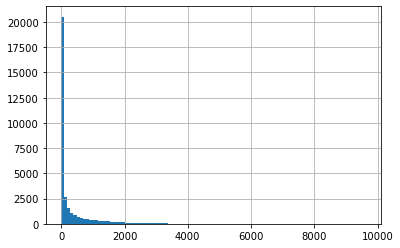

In [199]:
emp_status_2['incm_gt_75k_house_pct_l_30_gt_20'].hist(bins=100)

<AxesSubplot:>

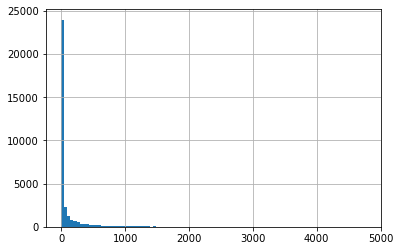

In [200]:
emp_status_2['incm_gt_75k_house_pct_gt_30'].hist(bins=100)

## Nonemployer


In [407]:
nonemployer = pd.read_csv('https://raw.githubusercontent.com/jhancuch/sba-loan-credit-analysis/main/data/nonemployer/nonemp18st.txt', delimiter=',', encoding = 'unicode_escape', engine ='python')

In [408]:
nonemployer.head()

,ST,NAICS,LFO,ESTAB_F,ESTAB,RCPTOT_N_F,RCPTOT_F,RCPTOT
0,1,00,-,NaN,336445,G,NaN,14797010
1,1,00,C,NaN,2120,G,NaN,284011
2,1,00,Z,NaN,10736,G,NaN,1494019
3,1,00,S,NaN,300297,G,NaN,9998975
4,1,00,P,NaN,23292,G,NaN,3020005


In [353]:
nonemployer1 = nonemployer[['ST', 'NAICS', 'RCPTOT']]

In [354]:
# Rename columns
nonemployer2 = nonemployer1.rename(columns = {"ST": "state_fips", "NAICS": "naics", "RCPTOT": "revenue_total"})

In [355]:
nonemployer2['state_fips'].value_counts()

12    2314
6     2300
36    2299
48    2299
17    2226
42    2203
13    2181
26    2169
39    2162
34    2153
37    2149
51    2115
8     2096
25    2084
22    2066
4     2065
53    2058
29    2032
18    2031
24    2031
47    2022
27    2021
40    2001
55    1998
32    1991
45    1978
1     1967
21    1965
41    1961
49    1957
9     1899
5     1895
28    1886
20    1868
19    1845
16    1762
31    1735
30    1728
35    1724
10    1714
15    1682
56    1642
23    1630
33    1622
54    1606
44    1541
46    1525
38    1500
2     1439
50    1435
11    1265
Name: state_fips, dtype: int64

In [356]:
nonemployer2['naics'].value_counts()

00        255
5312      255
541       255
54        255
5617      255
         ... 
532281     81
3252       77
56145      77
532283     54
3274       26
Name: naics, Length: 470, dtype: int64

In [362]:
# Subset to if only the naics is three digits long 
nonemployer3_list = []

for i in range(0, len(nonemployer2)):
    if len(nonemployer2.loc[i, 'naics']) == 3:
        temp_list = list(nonemployer2.iloc[i, :])
        nonemployer3_list.append(temp_list)
        
nonemployer3 = pd.DataFrame(nonemployer3_list, columns=['state_fips', 'naics', 'revenue_total'])

In [364]:
# adjust naics to only two digits
nonemployer3['naics'] = nonemployer3['naics'].astype(str)
nonemployer3['naics'] = nonemployer3['naics'].str.slice(0, 2)
nonemployer3['naics'].value_counts()

44    1930
33    1763
48    1458
51    1429
32    1359
31    1092
45     981
52     760
23     760
42     750
81     746
11     720
62     705
53     666
71     659
21     548
72     508
56     485
49     432
54     255
61     253
22     248
Name: naics, dtype: int64

<AxesSubplot:>

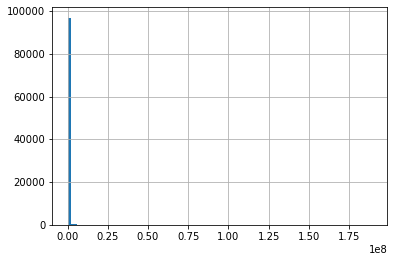

In [365]:
nonemployer2['revenue_total'].hist(bins=100)

## Manufacturing

In [405]:
manufacturing = pd.read_csv('https://raw.githubusercontent.com/jhancuch/sba-loan-credit-analysis/main/data/manufacturing/manufacturing2020.csv')

In [406]:
manufacturing.head()

,Geographic Area Name (NAME),2017 NAICS code (NAICS2017),Meaning of NAICS code (NAICS2017_LABEL),Year (YEAR),"Sales, value of shipments, or revenue ($1,000) (RCPTOT)","Relative standard error for estimate of sales, value of shipments, or revenue (%) (RCPTOT_S)","Annual payroll ($1,000) (PAYANN)",Relative standard error for estimate of annual payroll (%) (PAYANN_S),"First-quarter payroll ($1,000) (PAYQTR1)",Relative standard error for estimate of first-quarter payroll (%) (PAYQTR1_S),...,Relative standard error for estimate of advertising and promotional services (%) (PCHADVT_S),"Purchased professional and technical services ($1,000) (PCHPRTE)",Relative standard error for estimate of purchased professional and technical services (%) (PCHPRTE_S),"Taxes and license fees ($1,000) (PCHTAX)",Relative standard error for estimate of taxes and license fees (%) (PCHTAX_S),"All other operating expenses ($1,000) (PCHOEXP)",Relative standard error for estimate of all other operating expenses (%) (PCHOEXP_S),"Range indicating percent of total sales, value of shipments, or revenue imputed (RCPTOT_IMP)",Range indicating percent of total annual payroll imputed (PAYANN_IMP),Range indicating percent of total employees imputed (EMP_IMP)
0,Alabama,31-33,Manufacturing,2018,"137,578,434",0.2,"13,356,360",0.5,"3,319,728",0.7,...,N,N,N,N,N,N,N,30% to less than 40%,20% to less than 30%,30% to less than 40%
1,Alabama,31-33,Manufacturing,2019,"137,962,780",2.0,"14,280,134",1.9,"3,561,153",1.9,...,N,N,N,N,N,N,N,30% to less than 40%,20% to less than 30%,30% to less than 40%
2,Alabama,31-33,Manufacturing,2020,"128,150,773",2.3,"14,098,274",2.1,"3,676,892",2.2,...,N,N,N,N,N,N,N,20% to less than 30%,20% to less than 30%,Less than 10%
3,Alaska,31-33,Manufacturing,2018,"6,869,580",0.6,"615,024",0.7,"151,226",1.5,...,N,N,N,N,N,N,N,60% to less than 70%,40% to less than 50%,60% to less than 70%
4,Alaska,31-33,Manufacturing,2019,"6,443,039",0.6,"644,442",1.0,"152,007",0.8,...,N,N,N,N,N,N,N,20% to less than 30%,30% to less than 40%,50% to less than 60%


In [208]:
manufacturing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Columns: 109 entries, Geographic Area Name (NAME) to Range indicating percent of total employees imputed (EMP_IMP)
dtypes: float64(16), int64(1), object(92)
memory usage: 130.4+ KB


In [209]:
manufacturing1 = manufacturing[['Geographic Area Name (NAME)', '2017 NAICS code (NAICS2017)', 'Year (YEAR)', 'Sales, value of shipments, or revenue ($1,000) (RCPTOT)']]

In [210]:
manufacturing2 = manufacturing1.rename(columns = {'Geographic Area Name (NAME)': 'state', 
                                                  '2017 NAICS code (NAICS2017)': 'naics', 
                                                  'Year (YEAR)': 'year', 
                                                  'Sales, value of shipments, or revenue ($1,000) (RCPTOT)': 'total_revenue_1000s'})

In [212]:
manufacturing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   state                153 non-null    object
 1   naics                153 non-null    object
 2   year                 153 non-null    int64 
 3   total_revenue_1000s  153 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.9+ KB


In [214]:
# convert total revenue to int
manufacturing2['total_revenue_1000s'] = manufacturing2['total_revenue_1000s'].replace(',', '', regex=True)
manufacturing2['total_revenue_1000s'] = manufacturing2['total_revenue_1000s'].astype(int)

In [216]:
manufacturing2['state'].value_counts()

Alabama                 3
Pennsylvania            3
Nevada                  3
New Hampshire           3
New Jersey              3
New Mexico              3
New York                3
North Carolina          3
North Dakota            3
Ohio                    3
Oklahoma                3
Oregon                  3
Rhode Island            3
Montana                 3
South Carolina          3
South Dakota            3
Tennessee               3
Texas                   3
Utah                    3
Vermont                 3
Virginia                3
Washington              3
West Virginia           3
Wisconsin               3
Nebraska                3
Missouri                3
Alaska                  3
Idaho                   3
Arizona                 3
Arkansas                3
California              3
Colorado                3
Connecticut             3
Delaware                3
District of Columbia    3
Florida                 3
Georgia                 3
Hawaii                  3
Illinois    

In [217]:
manufacturing2['naics'].value_counts()

31-33    153
Name: naics, dtype: int64

In [218]:
manufacturing2['year'].value_counts()

2018    51
2019    51
2020    51
Name: year, dtype: int64

<AxesSubplot:>

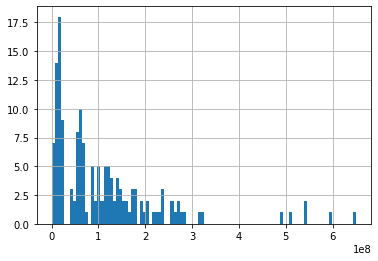

In [219]:
manufacturing2['total_revenue_1000s'].hist(bins=100)

## Retail Trade

In [409]:
retail_trade = pd.read_csv('https://raw.githubusercontent.com/jhancuch/sba-loan-credit-analysis/main/data/retail_trade/sales.csv', header = 3, encoding = 'unicode_escape', engine ='python')

In [410]:
retail_trade.head()

,NAICS Code,Kind of Business,2020,2019r,2018r,2017r,2016r,2015r,2014r,2013r,...,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257
0,NaN,"Retail sales, total ... ...","5,570,393","5,402,272","5,255,425","5,040,214","4,848,096","4,726,111","4,640,651","4,459,238",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"Retail sales, total (excl. motor vehicle and p...","4,362,089","4,164,528","4,050,484","3,854,518","3,696,376","3,622,590","3,613,911","3,497,181",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,GAFO1 ... ...,"1,229,215","1,306,269","1,298,225","1,274,977","1,267,817","1,262,841","1,241,577","1,213,826",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,441,Motor vehicle and parts dealers ...,"1,208,304","1,237,744","1,204,941","1,185,696","1,151,720","1,103,521","1,026,740","962,057",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4411,Automobile dealers ... ...,"1,023,172","1,065,549","1,035,685","1,020,587","991,812","949,238","880,991","821,791",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [411]:
retail_trade_1 = retail_trade.iloc[3:71, :]
retail_trade_2 = retail_trade_1[['NAICS Code','2020','2019r','2018r','2017r','2016r','2015r','2014r','2013r','2012','2011', '2010']]
retail_trade_3 = retail_trade_2.rename(columns = {'NAICS Code': 'naics',
                                                 '2019r': '2019',
                                                 '2018r': '2018',
                                                 '2017r': '2017',
                                                 '2016r': '2016',
                                                 '2015r': '2015',
                                                 '2014r': '2014',
                                                 '2013r': '2013'}).reset_index(drop=True)

In [412]:
retail_trade_3

,naics,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,441,"1,208,304","1,237,744","1,204,941","1,185,696","1,151,720","1,103,521","1,026,740","962,057","886,494","812,938","742,913"
1,4411,"1,023,172","1,065,549","1,035,685","1,020,587","991,812","949,238","880,991","821,791","752,778","684,505","621,180"
2,44111,"905,494","942,836","918,326","906,487","883,452","848,167","788,883","737,082","672,550","608,788","549,473"
3,44112,"117,678","122,713","117,359","114,100","108,360","101,071","92,108","84,709","80,228","75,717","71,707"
4,4412,"87,149","75,407","74,309","71,666","67,255","63,386","58,941","54,737","49,581","45,469","43,794"
...,...,...,...,...,...,...,...,...,...,...,...,...
63,454,"978,306","750,640","675,816","608,194","544,316","498,331","464,167","429,977","408,171","376,344","340,957"
64,4541,"888,502","657,089","583,789","524,639","467,278","418,960","376,891","346,163","328,655","294,697","263,488"
65,4542,"6,982","9,075","8,437","7,930","7,753","7,184","6,775","6,577","6,642","6,293","6,456"
66,4543,"82,822","84,476","83,590","75,625","69,285","72,187","80,501","77,237","72,874","75,354","71,013"


In [379]:
# Subset to if only the naics is three digits long 
retail_trade_4_list = []

for i in range(0, len(retail_trade_3)):
    if len(retail_trade_3.loc[i, 'naics']) == 3:
        temp_list = list(retail_trade_3.iloc[i, :])
        retail_trade_4_list.append(temp_list)
        
retail_trade_4 = pd.DataFrame(retail_trade_4_list, columns=['naics', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010'])

In [380]:
# Convert variables to integers and subset naics code to only two digits
retail_trade_4['naics'] = retail_trade_4['naics'].str.slice(0, 2)
for i in retail_trade_4.columns:
    retail_trade_4[i] = retail_trade_4[i].str.replace(',', '')
    retail_trade_4[i] = retail_trade_4[i].astype(int)

retail_trade_5 = retail_trade_4.groupby(['naics'])[['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010']].sum().reset_index()

In [381]:
retail_trade_5

,naics,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,44,3650486,3724753,3663796,3533051,3414105,3343706,3306999,3180839,3060568,2914794,2690873
1,45,1919907,1677519,1591629,1507163,1433991,1382405,1333652,1278399,1241661,1188158,1127175


## Services

In [413]:
services = pd.read_csv('https://raw.githubusercontent.com/jhancuch/sba-loan-credit-analysis/main/data/services/Table1.csv', header = 3, encoding = 'unicode_escape', engine ='python')

In [414]:
services.head()

,NAICS,NAICS Description,Item,Tax Status,Employer Status,2020 Estimate,2019 Estimate,2018 Estimate,2017 Estimate,2016 Estimate,...,2018 Coefficient of Variation,2017 Coefficient of Variation,2016 Coefficient of Variation,2015 Coefficient of Variation,2014 Coefficient of Variation,2013 Coefficient of Variation,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,000000,"Services Total1,8",Revenue,All Establishments,Employer and Nonemployer Firms,"17,606,914","18,000,647","17,112,559","16,169,814","15,393,780",...,0.2,0.1,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN
1,000000,"Services Total1,8",Revenue,All Establishments,Employer Firms,"16,668,151","16,999,369","16,160,891","15,266,389","14,541,859",...,0.2,0.1,0.4,0.3,NaN,NaN,NaN,NaN,NaN,NaN
2,00000A,"Selected Services Total2,8",Revenue,All Establishments,Employer and Nonemployer Firms,"16,957,694","17,227,899","16,380,539","15,477,165","14,735,913",...,0.2,0.1,0.3,0.2,NaN,NaN,NaN,NaN,NaN,NaN
3,00000A,"Selected Services Total2,8",Revenue,All Establishments,Employer Firms,"16,029,801","16,241,401","15,443,062","14,588,242","13,897,744",...,0.2,0.1,0.3,0.2,NaN,NaN,NaN,NaN,NaN,NaN
4,22,Utilities3,Revenue,All Establishments,Employer and Nonemployer Firms,"581,559","600,127","598,384","577,955","570,652",...,0.3,0.0,0.4,0.3,0.6,0.4,NaN,NaN,NaN,NaN


In [390]:
# subset columns and rows. We already have more granular data for nonemployer firms so we drop those
services_1 = services.loc[services['Employer Status'] == 'Employer Firms']
services_2 = services_1[['NAICS', '2020 Estimate', '2019 Estimate', '2018 Estimate', '2017 Estimate', '2016 Estimate']]
services_2 = services_2.rename(columns = {'NAICS': 'naics',
                                         '2020 Estimate': '2020',
                                         '2019 Estimate': '2019',
                                         '2018 Estimate': '2018',
                                         '2017 Estimate': '2017',
                                         '2016 Estimate': '2016'})
services_3 = services_2.loc[4:, :].copy().reset_index(drop=True)

In [395]:
# Subset to if only the naics is two digits long 
services_4_list = []

for i in range(0, len(services_3)):
    if len(services_3.loc[i, 'naics']) == 2:
        temp_list = list(services_3.iloc[i, :])
        services_4_list.append(temp_list)
        
services_4 = pd.DataFrame(services_4_list, columns=['naics', '2020', '2019', '2018', '2017', '2016'])

In [397]:
# Convert to integers and group by naics
for i in services_4.columns:
    services_4[i] = services_4[i].str.replace(',', '')
    services_4[i] = services_4[i].astype(int)

services_5 = services_4.groupby(['naics'])[['2020', '2019', '2018', '2017', '2016']].sum().reset_index()

In [398]:
services_5

,naics,2020,2019,2018,2017,2016
0,22,580647,599220,597481,577100,569673
1,51,1791438,1755214,1680739,1582097,1528182
2,52,4959947,4854315,4610615,4340009,4146670
3,53,730742,756268,712099,670304,635119
4,54,2143768,2077668,1963153,1855698,1741224
5,56,1042582,1090944,1023171,950896,886391
6,61,67793,72812,70293,65718,62890
7,62,2828912,2786127,2636270,2527900,2420320
8,71,210185,296444,280100,265621,248065
9,72,807086,1040970,989813,938236,895080


## Wholesale Trade

In [417]:
wholesale = pd.read_csv('https://raw.githubusercontent.com/jhancuch/sba-loan-credit-analysis/main/data/wholesale_trade/2020_awts_sales_table1.csv', header = 3, encoding = 'unicode_escape', engine ='python')

In [418]:
wholesale.head()

,2012 NAICS Code,Data Item,Kind of Business,Type of Operation,2020,2019r,2018r,2017r,2016r,2015r,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42,Sales,Wholesale Trade,Merchant Wholesalers,"8,037,360","8,607,066","8,630,377","8,032,209","7,510,613","7,544,582",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,423,Sales,Durable Goods,Merchant Wholesalers,"3,790,632","3,939,930","3,950,040","3,687,804","3,477,021","3,463,901",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4231,Sales,Motor Vehicle and Motor Vehicle Parts and Supp...,Merchant Wholesalers,"861,589","953,696","941,089","890,332","876,515","862,659",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4232,Sales,Furniture and Home Furnishings,Merchant Wholesalers,"119,716","122,658","119,676","115,061","108,523","103,304",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [419]:
wholesale.tail()

,2012 NAICS Code,Data Item,Kind of Business,Type of Operation,2020,2019r,2018r,2017r,2016r,2015r,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
74,Estimates have not been adjusted for price cha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,The Census Bureau has reviewed this data produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,r Revised data. For more information on the r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [420]:
# reformat table
wholesale1 = wholesale[['2012 NAICS Code', '2020', '2019r', '2018r', '2017r', '2016r', '2015r', '2014r', '2013r']]
wholesale2 = wholesale1.iloc[[1],:]
wholesale3 = wholesale2.rename(columns = {'2012 NAICS Code':'naics',
                                          '2020':'2020',
                                          '2019r':'2019',
                                          '2018r':'2018',
                                          '2017r':'2017',
                                          '2016r':'2016',
                                          '2015r':'2015',
                                          '2014r':'2014',
                                          '2013r':'2013'})

In [421]:
wholesale3

,naics,2020,2019,2018,2017,2016,2015,2014,2013
1,42,"8,037,360","8,607,066","8,630,377","8,032,209","7,510,613","7,544,582","7,878,972","7,583,631"
